# Contents
1. Business Problem Understanding
1. Data Understanding
1. Data Preprocessing (Data Cleaning, Feature Selection, Feature Engineering)
1. Explanatory Data Analysis
1. Modeling 
1. Conclusion
1. Recommendation / Improvement

# Business Problem Understanding

## Context

Bike sharing merupakan sistem persewaan sepeda dimana sepeda dapat disewa baik secara publik. Pada beberapa sistem Bike sharing, penyewa dapat menyewa sebuah sepeda dari satu lokasi station, dan mengembalikannya pada station lain yang lokasinya berbeda namun masih dalam satu sistem.

Data yang digunakan dalam project ini adalah data kondisi cuaca, musim, tanggal dan jam, serta total penyewa. Dari data tersebut, dapat dipelajari dan dianalisis keterkaitan antar fitur, sehingga dapat diperoleh metode untuk memprediksi perkiraan sepeda yang diperlukan pada waktu dengan kondisi tertentu.

# Problem Statement

Menyediakan jumlah unit sepeda yang cukup di setiap kondisi dan situasi. Jumlah unit sepeda yang terlalu sedikit dibandingkan permintaan maka  berdampak kepada hilangnya atau menurunnya kepercayaan pelanggan sehingga profit dapat menurun. Jumlah unit sepeda di stasiun yang terlalu banyak dibandingkan permintaaan, maka perusahaan juga akan rugi karena sepeda tidak digunakan sehingga cost operational dapat membengkak


## Goals

Berdasarkan permasalahan tersebut, diperlukan adanya suatu tools yang dapat memprediksi perkiraan penyewa pada waktu dan kondisi tertentu sehingga penyedia layanan Bike sharing dapat menentukan total unit sepeda yang harus dipersiapkan untuk masa mendatang.

## Analytic Approach

Untuk mencapai tujuan tersebut, pada project ini akan dilakukan proses analisis data untuk dapat menemukan pola dari fitur - fitur yang ada, yang memberikan informasi Bike sharing pada tanggal dan jam tertentu.

Selanjutnya, akan dibangun model regresi yang akan membantu penyedia layanan Bike sharing untuk memprediksi perkiraan total penyewa pada waktu tertentu.

## Metric Evaluation

Evaluasi metrik yang akan digunakan adalah MAE, MAPE dan R Square. Semakin mendekati nol nilai MAE dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi total penyewa sesuai dengan limitasi fitur yang digunakan. Semakin mendekati 1 nilai R-square maka semakin baik model dalam memprediksi data.

MAE adalah metrik sederhana yang menghitung selisih absolut antara hasil aktual dan hasil prediksi, cocok digunakan jika Y memiliki variance yang kecil, dan terdapat banyak outliers pada residual.

MAPE adalah rataan persentase error yang dihasilkan oleh model regresi, cocok digunakan jika ingin mengukur performa model berdasarkan error relative dan dapat digunakan untuk data dengan banyak outliers.

R-Squared adalah suatu nilai yang memperlihatkan seberapa besar variabel independen (eksogen) mempengaruhi variabel dependen (endogen)

# Data Understanding
* Dataset yang akan digunakan merupakan data rental sepeda pada tahun 2011 - 2012.
* Setiap baris data merepresentasikan informasi terkait penyewaan sepeda pada jam dan tanggal tertentu.

In [1]:
# data 
import pandas as pd 
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('data_bike_sharing.csv')
display(df.head(),df.tail())

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69
12164,2011-04-28,0.47,1,0,2,0.6212,0.64,18,44,486,530


# Data Preprocessing
Pada tahap data preprocessing, akan dilakukan cleaning data. Dataset yang sudah bersih akan digunakan untuk proses analisis lebih lanjut. Pada tahap ini, akan dilakukan :

* Eksplorasi Fitur yang relevan
* Cek Missing Value
* Cek Multikolinieritas dan melakukan treatment yang sesuai
* Mengganti type data yang sesuai
* Jika terdapat outlier, perlu dilakukan treatment yang sesuai.

## Eksplorasi Fitur Date dan Rename Nama Fitur

In [3]:
# duplikasi df menjadi df baru
df_prep = df.copy()


# eksplorasi fitur baru dari fitur date time
df_prep['year'] = pd.to_datetime(df_prep['dteday']).dt.year
df_prep['month'] = pd.to_datetime(df_prep['dteday']).dt.month
df_prep['dayname'] = pd.to_datetime(df_prep['dteday']).dt.day_name()

# rename fitur agar lebih mudah
df_prep.rename(columns = {
    'hum' : 'humidity',
    'weathersit' : 'weather',
    'hr' : 'hour',
    'cnt' : 'count',
     }, inplace = True)

df_prep

,dteday,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,year,month,dayname
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,Friday
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,Sunday
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,Wednesday
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,Saturday
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,2012,1,Wednesday
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,2012,7,Friday
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,2012,2,Monday
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,2012,3,Saturday


## Cek missing value dan type

In [4]:
def df_prep_detail():
    list_var = []
    for a in df_prep.columns:
        list_var.append([
        a,
        df_prep[a].dtype,
        df_prep[a].isna().sum(),
        df_prep[a].nunique(),
        list(df_prep[a].drop_duplicates().sample(2).values)
          ])
    df_detail = pd.DataFrame(columns = ['fitur','type','isna','n_unique','values'], data = list_var)
    return df_detail  
df_prep_detail()

,fitur,type,isna,n_unique,values
0,dteday,object,0,731,"[2012-10-13, 2012-01-01]"
1,humidity,float64,0,89,"[0.12, 0.39]"
2,weather,int64,0,4,"[1, 3]"
3,holiday,int64,0,2,"[1, 0]"
4,season,int64,0,4,"[3, 2]"
5,atemp,float64,0,65,"[0.3333, 0.6364]"
6,temp,float64,0,50,"[0.14, 0.82]"
7,hour,int64,0,24,"[15, 16]"
8,casual,int64,0,305,"[302, 49]"
9,registered,int64,0,742,"[796, 549]"


## Multikolinieritas

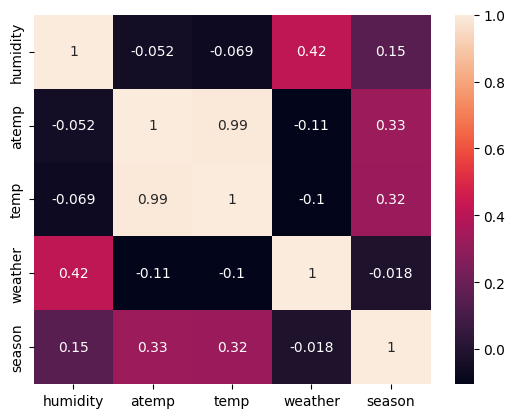

In [5]:
num = ['humidity', 'atemp', 'temp', 'weather', 'season']
sns.heatmap(df_prep[num].corr(), annot=True)
plt.show()

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x) :

    vif = pd.DataFrame()
    vif['variable'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif

calc_vif(df_prep[num])

,variable,vif
0,humidity,11.422093
1,atemp,334.671524
2,temp,305.298350
3,weather,6.760489
4,season,6.754830


In [7]:
# drop beberapa fitur yang tidak digunakan dalam kasus ini

df_prep.drop(['casual', 'registered', 'temp', 'dteday'], axis=1, inplace=True)
df_prep

,humidity,weather,holiday,season,atemp,hour,count,year,month,dayname
0,0.62,1,0,4,0.3485,16,250,2011,12,Friday
1,0.64,1,0,2,0.5152,4,18,2012,6,Sunday
2,0.53,1,0,2,0.6212,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.3485,8,145,2012,3,Saturday
4,0.55,1,0,3,0.6970,18,857,2012,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,7,257,2012,1,Wednesday
12161,0.62,1,0,3,0.7424,0,102,2012,7,Friday
12162,0.60,2,1,1,0.2121,5,6,2012,2,Monday
12163,0.77,2,0,2,0.4242,2,69,2012,3,Saturday


In [8]:
calc_vif(df_prep[['humidity','atemp','weather','season']])

,variable,vif
0,humidity,10.879654
1,atemp,7.016829
2,weather,6.757509
3,season,6.752072


vif nya sudah cukup mendekat 4 semua, hanya humidity yg sdikit di atas 10. tp masih dalam batas toleransi karena tidak jauh di atas 10. Sebeenenrya bisa di PCA utk menurunkan multukolinairity, namun fiturnya terlalu dikit, sehingga jika dilakukan PCA fitur yang dihasilkan menjadi sangat sedikit.

## Mengganti type dan value data nya

In [9]:
df_prep_detail()

,fitur,type,isna,n_unique,values
0,humidity,float64,0,89,"[0.3, 0.57]"
1,weather,int64,0,4,"[4, 3]"
2,holiday,int64,0,2,"[0, 1]"
3,season,int64,0,4,"[2, 4]"
4,atemp,float64,0,65,"[0.197, 0.0152]"
5,hour,int64,0,24,"[10, 14]"
6,count,int64,0,830,"[872, 359]"
7,year,int64,0,2,"[2012, 2011]"
8,month,int64,0,12,"[9, 5]"
9,dayname,object,0,7,"[Monday, Saturday]"


In [10]:
from dataclasses import replace
df_prep.replace({'weather' : { 1 : 'clear', 2 : 'mist_cloudy', 3 : 'light_snow_rain', 4 : 'heavy_snow_rain'}}, inplace= True)
df_prep['holiday'] = df_prep['holiday'].astype('category')
df_prep.replace({'season' : { 1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'fall'}}, inplace= True)
df_prep['year'] = df_prep['holiday'].astype('category')
df_prep['month'] = df_prep['holiday'].astype('category')

In [11]:
df_prep_detail()

,fitur,type,isna,n_unique,values
0,humidity,float64,0,89,"[0.75, 0.24]"
1,weather,object,0,4,"[heavy_snow_rain, clear]"
2,holiday,category,0,2,"[1, 0]"
3,season,object,0,4,"[fall, winter]"
4,atemp,float64,0,65,"[0.8939, 0.2879]"
5,hour,int64,0,24,"[4, 19]"
6,count,int64,0,830,"[672, 677]"
7,year,category,0,2,"[1, 0]"
8,month,category,0,2,"[1, 0]"
9,dayname,object,0,7,"[Thursday, Friday]"


In [12]:
# data yang sudah dirapihkan tahap 1
df_prep

,humidity,weather,holiday,season,atemp,hour,count,year,month,dayname
0,0.62,clear,0,fall,0.3485,16,250,0,0,Friday
1,0.64,clear,0,spring,0.5152,4,18,0,0,Sunday
2,0.53,clear,0,spring,0.6212,23,107,0,0,Wednesday
3,0.87,mist_cloudy,0,spring,0.3485,8,145,0,0,Saturday
4,0.55,clear,0,summer,0.6970,18,857,0,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,clear,0,winter,0.2273,7,257,0,0,Wednesday
12161,0.62,clear,0,summer,0.7424,0,102,0,0,Friday
12162,0.60,mist_cloudy,1,winter,0.2121,5,6,1,1,Monday
12163,0.77,mist_cloudy,0,spring,0.4242,2,69,0,0,Saturday


## Outliers


<AxesSubplot:>

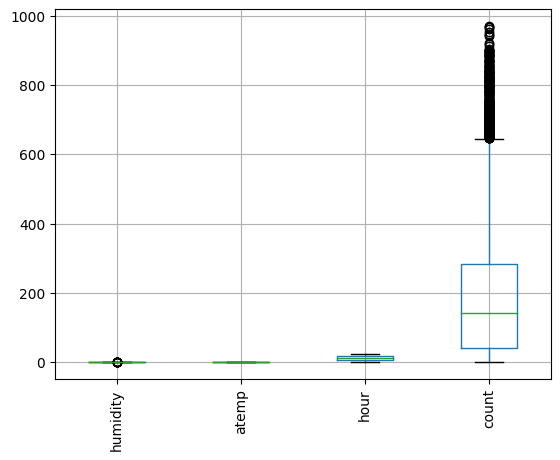

In [13]:
df_prep.boxplot(rot = 90)

In [14]:
def outliers_prep(a):
    print(a)
    q1 = df_prep[a].quantile(0.25)
    q3 = df_prep[a].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    jumlah_outliers = df_prep[(df_prep[a] > limit_atas) | (df_prep[a] < limit_bawah)].count()['humidity']
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}') 
    print(f'jumlah outliers: {jumlah_outliers}')
    sns.boxplot(df_prep[a])
    plt.show()    

humidity
IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245
jumlah outliers: 14


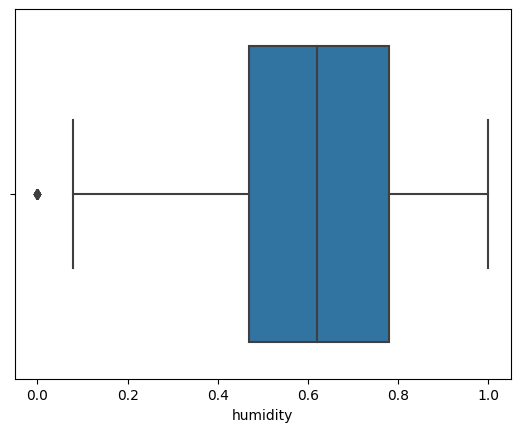

atemp
IQR: 0.2879
limit_bawah: -0.09854999999999997
limit_atas: 1.0530499999999998
jumlah outliers: 0


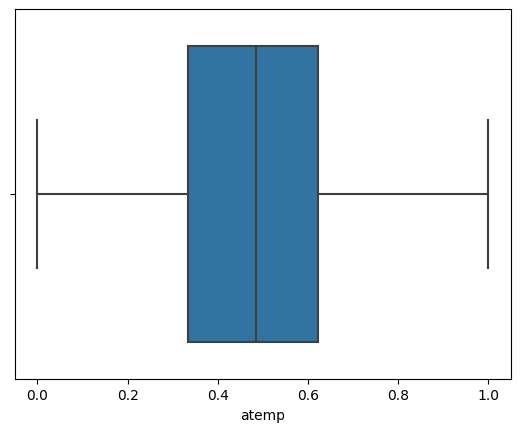

hour
IQR: 12.0
limit_bawah: -12.0
limit_atas: 36.0
jumlah outliers: 0


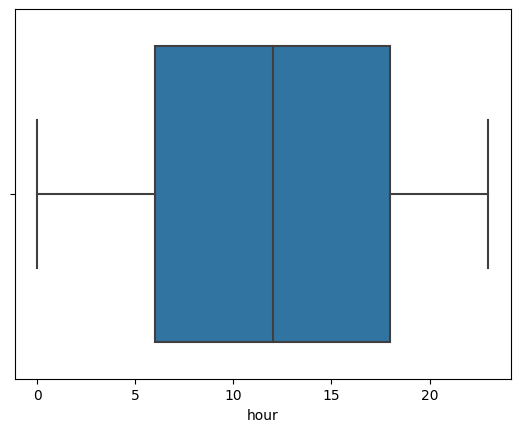

count
IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0
jumlah outliers: 338


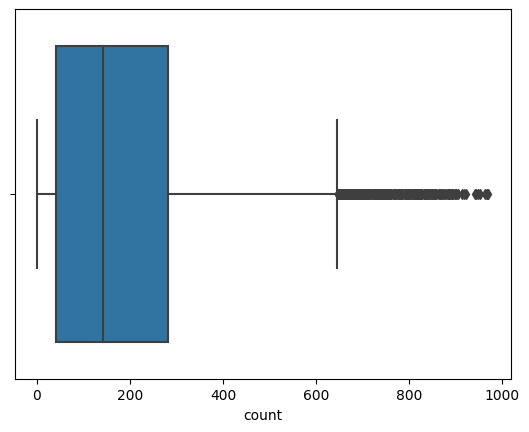

In [15]:
# Outliers pada fitur humidity
outliers_prep('humidity')

outliers_prep('atemp')

outliers_prep('hour')

outliers_prep('count')


In [16]:
# Filtering fitur yang memiliki outliers

df_prep = df_prep[(df_prep['humidity'] <= 1.245) & (df_prep['humidity'] >= 0.004999999999999893)]
# df_prep = df_prep[(df_prep['atemp'] <= 1.0530499999999998) | (df_prep['atemp'] >= -0.09854999999999997)] 
# setelah dicoba, outlier pada fitur atemp tidak perlu di remove, karena adanya penurunan hasil model. jadi solusi nya di waktu evaluasi menggunakan metrics MAE dan MAPE

humidity
IQR: 0.30000000000000004
limit_bawah: 0.029999999999999916
limit_atas: 1.23
jumlah outliers: 0


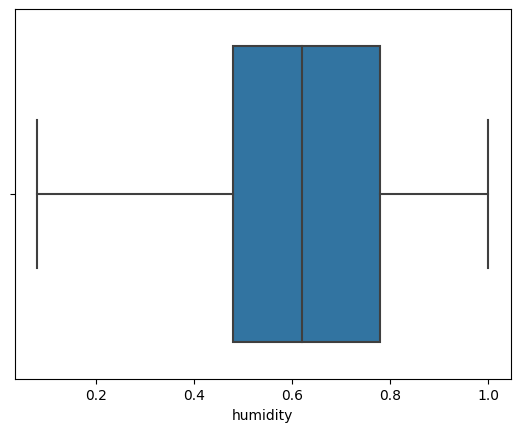

In [17]:
outliers_prep('humidity')

In [18]:
# data bersih
df_prep

,humidity,weather,holiday,season,atemp,hour,count,year,month,dayname
0,0.62,clear,0,fall,0.3485,16,250,0,0,Friday
1,0.64,clear,0,spring,0.5152,4,18,0,0,Sunday
2,0.53,clear,0,spring,0.6212,23,107,0,0,Wednesday
3,0.87,mist_cloudy,0,spring,0.3485,8,145,0,0,Saturday
4,0.55,clear,0,summer,0.6970,18,857,0,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,clear,0,winter,0.2273,7,257,0,0,Wednesday
12161,0.62,clear,0,summer,0.7424,0,102,0,0,Friday
12162,0.60,mist_cloudy,1,winter,0.2121,5,6,1,1,Monday
12163,0.77,mist_cloudy,0,spring,0.4242,2,69,0,0,Saturday


# Explanatory Data Analysis (EDA)

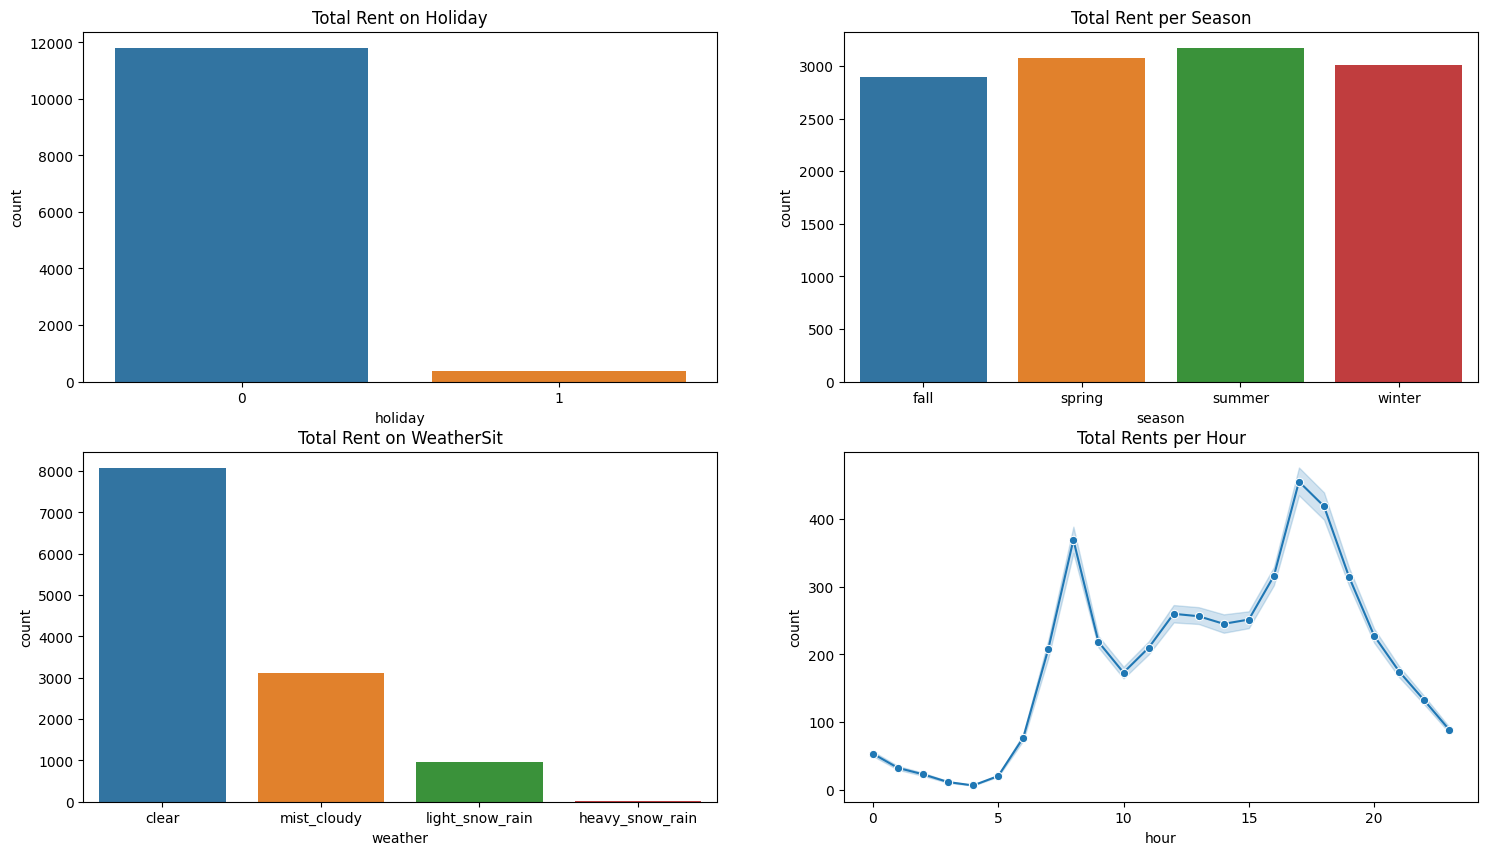

In [19]:
plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
sns.countplot(df_prep['holiday'])
plt.title('Total Rent on Holiday', size = 12)

plt.subplot(2,2,2)
sns.countplot(df_prep['season'])
plt.title('Total Rent per Season', size = 12)

plt.subplot(2,2,3)
sns.countplot(df_prep['weather'])
plt.title('Total Rent on WeatherSit', size = 12)

plt.subplot(2,2,4)
sns.lineplot(data=df_prep, x='hour', y='count', marker = 'o')
plt.title('Total Rents per Hour', size = 12)

plt.show()

Dari 12151 data, terdapat sekitar 11 ribuan data yang diperoleh pada hari kerja dan sekitar 300 data pada hari libur. Total persewaan tertinggi terdapat pada season summer, diikuti spring, winter dan fall. Sepeda banyak disewa saat kondisi cuaca cerah hingga berawan, namun sangat sedikit yang menyewa saat cuaca hujan deras, bersalju, badai, dan berkabut. Jam efektif persewaan adalah pada jam 6 hingga 23. Persewaan sering terjadi pada jam 8, 16, 17, 18, 19.

# Modeling

Evaluasi Model nantinya akan menggunakan MAE, MAPE dan R-Squared. 

Mengapa menggunakan MAE dan MAPE? Karena data yang akan digunakan memiliki outlier yang cukup besar. Sudah dicoba dihilangkan, justru malah akurasi model menjadi menurun. Sehingga outlier dipertahankan namun metrics evaluasi nya disesuaikan

In [20]:
# Data splitting
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold


# Transformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Generalisasi
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Base Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Ensemble Method Model
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Evaluasi
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [21]:
display(df_prep.describe(include = 'all'), df_prep.describe(include='object'))

,humidity,weather,holiday,season,atemp,hour,count,year,month,dayname
count,12151.000000,12151,12151.0,12151,12151.000000,12151.000000,12151.000000,12151.0,12151.0,12151
unique,NaN,4,2.0,4,NaN,NaN,NaN,2.0,2.0,7
top,NaN,clear,0.0,summer,NaN,NaN,NaN,0.0,0.0,Wednesday
freq,NaN,8071,11789.0,3169,NaN,NaN,NaN,11789.0,11789.0,1769
mean,0.626172,NaN,NaN,NaN,0.477101,11.519875,189.457329,NaN,NaN,NaN
std,0.191036,NaN,NaN,NaN,0.171922,6.932187,181.242898,NaN,NaN,NaN
min,0.080000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,0.480000,NaN,NaN,NaN,0.333300,6.000000,40.000000,NaN,NaN,NaN
50%,0.620000,NaN,NaN,NaN,0.484800,12.000000,142.000000,NaN,NaN,NaN
75%,0.780000,NaN,NaN,NaN,0.621200,18.000000,282.000000,NaN,NaN,NaN


,weather,season,dayname
count,12151,12151,12151
unique,4,4,7
top,clear,summer,Wednesday
freq,8071,3169,1769


Encoding

Target: Count

Passthrough: Humidity, Temperature, Hour, Month, Year

OneHotEncoding: Season, Weather, Holiday

BinaryEncoding: Day Name

## Transformasi Fitur

In [22]:
# Tranformasikan fitur kategorikal dengan encoder

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['season', 'weather', 'holiday']),
    ('Binary', ce.BinaryEncoder(), ['dayname'])
], remainder='passthrough')

## Data Splitting

In [23]:
X = df_prep.drop(['count'], axis=1)
y = df_prep['count']

# Splitting data
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2009)

## Benchmark Model

In [24]:
# Benchmark model algoritma 
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2009)
rf = RandomForestRegressor(random_state=2009)
gb= GradientBoostingRegressor(random_state=2009)
xgb = XGBRegressor(random_state=2009)


In [25]:
# Transformasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [26]:
# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

# Scaling data
scaler = StandardScaler()

# List kosong untuk evaluasi
score_mae = []
nilai_mean_mae = []

score_mape = []
nilai_mean_mape = []

score_r2 = []
nilai_mean_r2 = []


# Mencari algoritma terbaik berdasarkan nilai MAE, MAPE, RMSE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    
    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())


    # R Square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())


    

In [28]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor','Gradient Boosting Regressor', 'XGBoost Regressor'],
    'MAE': nilai_mean_mae,
    'MAPE': nilai_mean_mape,
    'R-squared' : nilai_mean_r2
})

,Model,MAE,MAPE,R-squared
0,Linear Regression,-110.117063,-1.418332,0.159570
1,KNN Regressor,-73.508578,-0.906028,0.566956
2,DecisionTree Regressor,-66.816539,-0.612013,0.645612
3,RandomForest Regressor,-51.452223,-0.429192,0.798761
4,Gradient Boosting Regressor,-63.646951,-0.540634,0.679652
5,XGBoost Regressor,-47.704754,-0.378910,0.828963


XG Boost menjadi model terbaik yag dipilih dengan pertimbangan nilai MAE dan MAPE yang paling kecil dan nilai R-Squared yang paling mendekati 1



**Penjelasan Singkat XGBoost**

Extreme Gradient Boosting (XG Boost) merupakan salah satu model yang termasuk ke dalam similar type ensemble method. Di dalam algoritma ini, Decision Trees dibuat dalam bentuk yang sekuensional, dimana bobot memiliki peran penting dala XG Boost. Bobot diterapkan kepada semua variabel independen yang nantinya akan dimasukkan ke dalam decisien trees untuk memprediksi hasil. Bobot dari Variabel yang diprediksi salah akan ditambahkan dan variaben in iakan dimasukan ke dalam decision tree yang berikutnya.

Model ini termasuk ke dalam non interpretable model dikarenakan kita tidak dapat mengetahui variabel mana yang salah diprediksi. XGBoost memiliki kinerja yang baik karena termasuk model yang robust untuk berbagai jenis data

## Prediksi Model Terbaik pada Test Set 

In [29]:
# Benchmark model terbaik
model = XGBRegressor(random_state=2009)

score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
        ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))


In [33]:
score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'R-sqaured': score_r2}, index=model.keys())
score_before_tuning

,MAE,MAPE,R-sqaured
0,50.237938,0.633734,0.832277


Ketika dilakukan prediksi pada test set, performa XGBoost juga cukup baik dan tidak memiliki berbedaan signifikan dengan train set. Sehingga, dapat diartikan bahwa model tidak mengalami overfitting atau underfitting.

## Hyperparameter Tuning

Selanjutnya, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Berikut ini panduan dan beberapa tips untuk XGBoost Hyperparameter Tuning :

https://xgboost.readthedocs.io/en/latest/parameter.html

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [34]:
# Kedalaman pohon. Semakin dalam kemungkinan meningkatkan performance, namun juga kompleksitas dan kemungkinan overfit.
# value integer > 0. Defaultnya 6.
max_depth = list(np.arange(5, 16)) # 5 - 15

# Learning rate. Menentukan ukuran step pada tiap iterasi sementara model mengoptimalkan ke arah tujuannya.
# Learning rate rendah membuat komputasi lebih lambat, dan perlu lebih banyak putaran untuk mencapai pengurangan di
# residual error yang sama seperti model dengan learning rate tinggi. Namun akan mengoptimalkan peluang untuk mencapai best optimum.
# Nilainya 0 - 1. Defaultnya 0,3.
learning_rate = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah pohon di ensemble. Ekuivalen dengan total round dari boosting.
# value integer > 0. Defaultnya 100.
n_estimators = list(np.arange(100, 300)) # 100 - 299


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

In [35]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2009, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2009  
)

## Fitting pada data Training

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

In [38]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -49.075415097091835
Best_params: {'model__n_estimators': 186, 'model__max_depth': 8, 'model__learning_rate': 0.1}


## Prediksi Test Set dengan Hyperparameter Tuning

In [39]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2009)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R-square' : r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,R-square
XGB,48.95804,0.567787,0.834196


## Membandingkan sebelum vs sesudah

In [40]:
score_before_tuning

,MAE,MAPE,R-sqaured
0,50.237938,0.633734,0.832277


In [41]:
score_after_tuning

,MAE,MAPE,R-square
XGB,48.95804,0.567787,0.834196


Dapat dilihat bahwa setelah dilakukan hyperparameter tuning, model mengalami peningkatan pada nilai MAE dan MAPE nya yang turun cukup signifikan. Walaupun R-Squared nya tidak mengalami perubahan secara signifikan

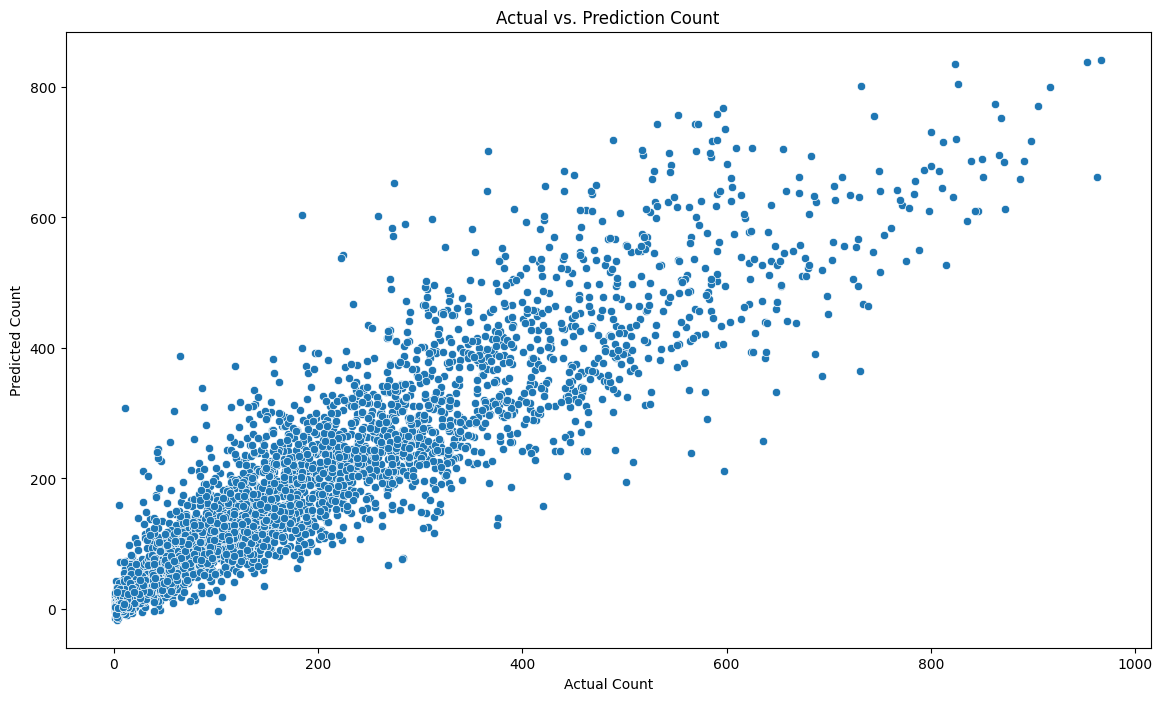

In [42]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')

Dari scatterplot diatas, terlihat bahwa hasil prediksi yang diperoleh cukup baik. Namun masih terdapat kemungkinan bias.

In [44]:
list_mae = []
list_mape = []

data = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred_xgb_tuning})
data = data[data['y_test'] <= 50]
mae = mean_absolute_error(data['y_test'], data['y_pred'])
mape = mean_absolute_percentage_error(data['y_test'], data['y_pred'])
list_mae.append(mae)
list_mape.append(mape)


for i, j in zip(range(50, 551, 50),range(100, 601, 50)):
    data = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred_xgb_tuning})
    data = data[data['y_test'] > i]
    data = data[data['y_test'] < j]
    mae = mean_absolute_error(data['y_test'], data['y_pred'])
    mape = mean_absolute_percentage_error(data['y_test'], data['y_pred'])
    list_mae.append(mae)
    list_mape.append(mape)

data = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred_xgb_tuning})
data = data[data['y_test'] > 600]
mae = mean_absolute_error(data['y_test'], data['y_pred'])
mape = mean_absolute_percentage_error(data['y_test'], data['y_pred'])
list_mae.append(mae)
list_mape.append(mape)

In [45]:
pd.DataFrame({
    'count' : ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500','501-550', '551-600', '>600'],
    'MAE' : list_mae,
    'MAPE' : list_mape
})

,count,MAE,MAPE
0,<=50,14.933634,1.257812
1,51-100,35.156671,0.476553
2,101-150,44.952105,0.357733
3,151-200,49.558364,0.285616
4,201-250,50.599152,0.227000
5,251-300,62.446995,0.227056
6,301-350,78.283193,0.244074
7,351-400,74.197806,0.198645
8,401-450,87.285489,0.205589
9,451-500,94.011405,0.198837


Dari hasil model tersebut, kita bisa mengetahui limitasi modelnya

Berdasarkan hasil pengelompokkan target, terlihat bahwa untuk target dengan jumlah unit sepeda yang disewa berjumlah kurang dari sama dengan 100 memiliki nilai MAPE sebesar 45% - 132%, walaupun pembagian nilai training set dan testing set sudah cukup baik.

Sehingga limitasi dari model ini adalah model ini mampu memprediksi dengan baik pada jumlah target di atas 100

## Feature Importence

<AxesSubplot:title={'center':'Feature Importances'}>

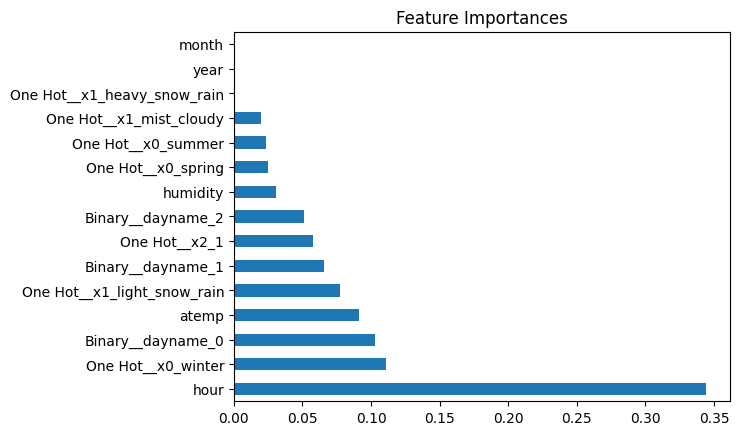

In [46]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances')

# Conclusion and Recomendation


**Conclusion**
* Diketahui dari hasil hyperparameter tuning bahwa parameter terbaik yang dapat digunakan dengan benchmark model XGBoost adalah:
- n_estimators: 215
- max_depth: 15
- learning_rate: 0.1

* Berdasarkan pemodelan yang telah dilakukan, fitur 'Hour' merupakan fitur yang paling berpengaruh terhadap 'Count'.

* Untuk matriks evaluasi yang digunakan adalah MAE, MAPE dan R-Squared. Jila dilihat menggunakan MAPE yang dihasilkan setelah hyperparameter tuning adalah 58%. Sehingga dapat disimpulkan bahwa jika model akan digunakan untuk memperkirakan penyewa sepeda pada rentang nilai sesuai model yang dilatih (maksimal Count 970), maka perkiraan penyewa dapat meleset kurang lebih 58% dari orang dari total aktualnya. 

* Namun dapat terjadi kesalahan lebih jauh juga karena masih terdapat bias yang terlihat dari visualisasi data prediksi dan aktual. Bias dapat terjadi karena masih kurangnya fitur pada dataset untuk merepresentasikan keadaan dimana orang akan memutuskan untuk menyewa sepeda, seperti lokasi station, adanya event tertentu, dan lain - lain.

* Bias yang diprediksi dihasilkan karena terbatasnya feature pada dataset yang berkaitan dengan Target, seperti lokasi stasiun sepeda, jarak stasiun sepeda dengan perkantoran / sekolah / ruang publik




**Recomendation**

* Penambahan fitur yang lebih korelatif dengan target ('Count') seperti adanya event tertentu dan jarak lokasi station dengan lokasi perkantoran, sekolah, atau tempat wisata.

* Penambahan data. Jika terdapat data lebih banyak dan lebih dari dua tahun, dapat dianalisis lebih baik lagi keterkaitan tahun dengan Count. Dapat juga digunakan model yang lebih kompleks untuk proses pemodelannya untuk dibandingan dan dicari model dengan error paling sedikit.

* Model yang telah dibangun juga dapat dimanfaatkan untuk pengembangan lainnya. Misalnya pembuatan model untuk memprediksi harga rental atau pembuatan model untuk memprediksi jumlah sepeda yang keluar atau masuk di station tertentu. Jika ada, dapat dianalisis lokasi station strategis, dan dapat menjadi sebuah pertimbangan untuk membuka station baru di tempat yang serupa.

# Save Model

In [115]:
# Save model
import pickle

# final_model = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# final_model.fit(X_train, y_train)
final_model = random_xgb.best_estimator_.fit(X_train, y_train)

pickle.dump(final_model, open('Model_XGB_BikeSharing.sav', 'wb'))

In [116]:
# Load model
filename = 'Model_XGB_BikeSharing.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [118]:
mean_absolute_percentage_error(y_test, loaded_model.predict(X_test))

0.5833350751401148

In [48]:
import folium

In [52]:
world = folium.Map(location= [-6.2, 106], zoom_start= 10, tiles = 'Stamen Toner')

In [54]:
2 % 2

0

In [55]:
x = [7,2,1,8,7,3,5,9,11]

NameError: name 'mean' is not defined

In [57]:
np.median(x)

7.0

In [61]:
varian = sum(x) / (len(x) - 1)

In [59]:
import statistics

In [62]:
statistics.sqrt(varian)

2.57390753524675

In [63]:
len('sherlock')

8

In [64]:
4 % 2

0

In [65]:
4**2

16

In [67]:
df_prep

,humidity,weather,holiday,season,atemp,hour,count,year,month,dayname
0,0.62,clear,0,fall,0.3485,16,250,0,0,Friday
1,0.64,clear,0,spring,0.5152,4,18,0,0,Sunday
2,0.53,clear,0,spring,0.6212,23,107,0,0,Wednesday
3,0.87,mist_cloudy,0,spring,0.3485,8,145,0,0,Saturday
4,0.55,clear,0,summer,0.6970,18,857,0,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,clear,0,winter,0.2273,7,257,0,0,Wednesday
12161,0.62,clear,0,summer,0.7424,0,102,0,0,Friday
12162,0.60,mist_cloudy,1,winter,0.2121,5,6,1,1,Monday
12163,0.77,mist_cloudy,0,spring,0.4242,2,69,0,0,Saturday


In [68]:
df_prep[df_prep['dayname'] == 'Friday']['count'].mean()

194.6514450867052

In [69]:
df_prep.groupby('dayname').mean().loc['Friday']['count']

194.6514450867052

In [70]:
x = 0 
while x <= 10:
    if x >= 7:
        print(x+1)
        x+= 1
    else :
        print(x)
        x += 1

0
1
2
3
4
5
6
8
9
10
11


In [71]:
x = 0 
while x <= 10:
    if x == 7:
        break
    else :
        print(x)
        x += 1


0
1
2
3
4
5
6


In [74]:
def multiple_all(a_list):
    from functools import reduce
    return reduce(lambda x, y: x*y, a_list)

print(multiple_all([4,3,5,6]))

360


In [77]:
def multiple_all(a_list):
    hasil = 1
    for i in a_list:
        hasil *= i
    return hasil

print(multiple_all([4,3,5,6]))

360


In [80]:
x = [8, 3, 2, 9, 8, 4, 6, 10, 12]
np.mean(x)

6.888888888888889

In [82]:
statistics.stdev(x)

3.370624736026114

In [83]:
x = 5
y = 2
def calculation(x, y):
    x +=2
    return x + y

calculation(2, 3)

7